# Compare Previous Violations History Experiment

**Goal**: Reproduce the results from the previous violation comparison experiment using base regressors (psytrack), one trial back previous history or filtered previous history

The goal of this is to ensure the model comparison code is working as expected and the interaction comparison results are still valid.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import sys
[
    sys.path.append(str(folder))
    for folder in pathlib.Path("../src/").iterdir()
    if folder.is_dir()
]

from experiment_compare_models import ExperimentCompareModels
from multiclass_logistic_regression import MultiClassLogisticRegression
from model_visualizer import ModelVisualizerCompare
from design_matrix_generator import DesignMatrixGeneratorFilteredHistory
sns.set_context("talk")
%load_ext autoreload
%autoreload 2

In [2]:
stg4_animals = [
    "W051",
    "W060",
    "W065",
    "W068",
    "W072",
    "W073",
    "W074",
    "W075",
    "W078",
    "W080",
    "W082",
    "W083",
    "W088",
    "W089",
]
model_config = {
    "psytrack_features": {  # MODEL 1
        "model_class": MultiClassLogisticRegression,
        "model_type": "multi",
        "design_matrix_generator": DesignMatrixGeneratorFilteredHistory,
        "filter_implementation": {"prev_violation": -1},  # no filter & drop column
    },
    "prev_violation": {  # MODEL 2
        "model_class": MultiClassLogisticRegression,
        "model_type": "multi",
        "design_matrix_generator": DesignMatrixGeneratorFilteredHistory,
        "filter_implementation": {"prev_violation": 0},  # no filter
    },
    "filter_prev_violation": {  # MODEL 3
        "model_class": MultiClassLogisticRegression,
        "model_type": "multi",
        "design_matrix_generator": DesignMatrixGeneratorFilteredHistory,
        "filter_implementation": {
            "prev_violation": 1
        },  # filter column with animals tau
    },
}
params = {
    "animals": stg4_animals,
    "sigmas": [0.07, 0.13, 0.25, 0.5, 1, 2, 4, 8, 16],
    "random_state": 47,
    "null_mode": "multi",
    "eval_train": True,
    "tau_columns": ["prev_violation"],
    "model_config": model_config,
    "min_training_stage": 4,
}

In [3]:
experiment = ExperimentCompareModels(params)
experiment.run()
experiment.save(file_name="2024_01_17_stg_4_compare_prev_violation_history.pkl")

returning viol data for ['W051', 'W060', 'W065', 'W068', 'W072', 'W073', 'W074', 'W075', 'W078', 'W080', 'W082', 'W083', 'W088', 'W089']
minimum training stage is  4

 >>>> evaluating animal W051 <<<<

 ***** evaluating model psytrack_features w/ sigma 0.07 *****
         Current function value: 37953.489517
         Iterations: 21
         Function evaluations: 97
         Gradient evaluations: 85

 ***** evaluating model psytrack_features w/ sigma 0.13 *****
Optimization terminated successfully.
         Current function value: 37887.932830
         Iterations: 20
         Function evaluations: 32
         Gradient evaluations: 32

 ***** evaluating model psytrack_features w/ sigma 0.25 *****
Optimization terminated successfully.
         Current function value: 37867.626163
         Iterations: 21
         Function evaluations: 38
         Gradient evaluations: 38

 ***** evaluating model psytrack_features w/ sigma 0.5 *****
Optimization terminated successfully.
         Current fun

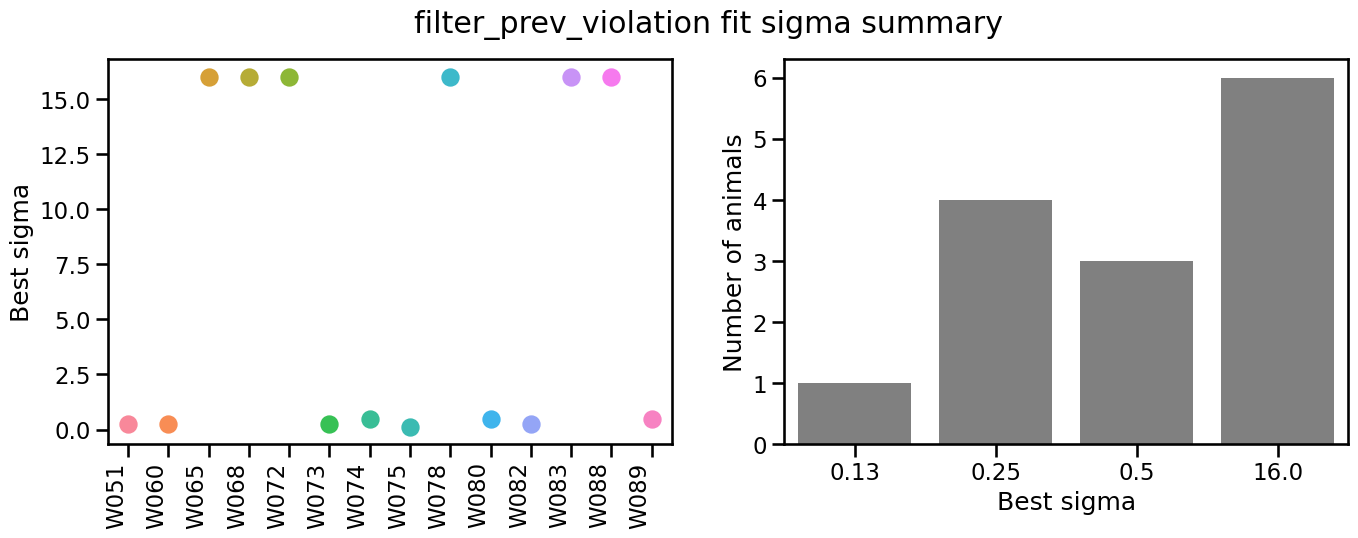

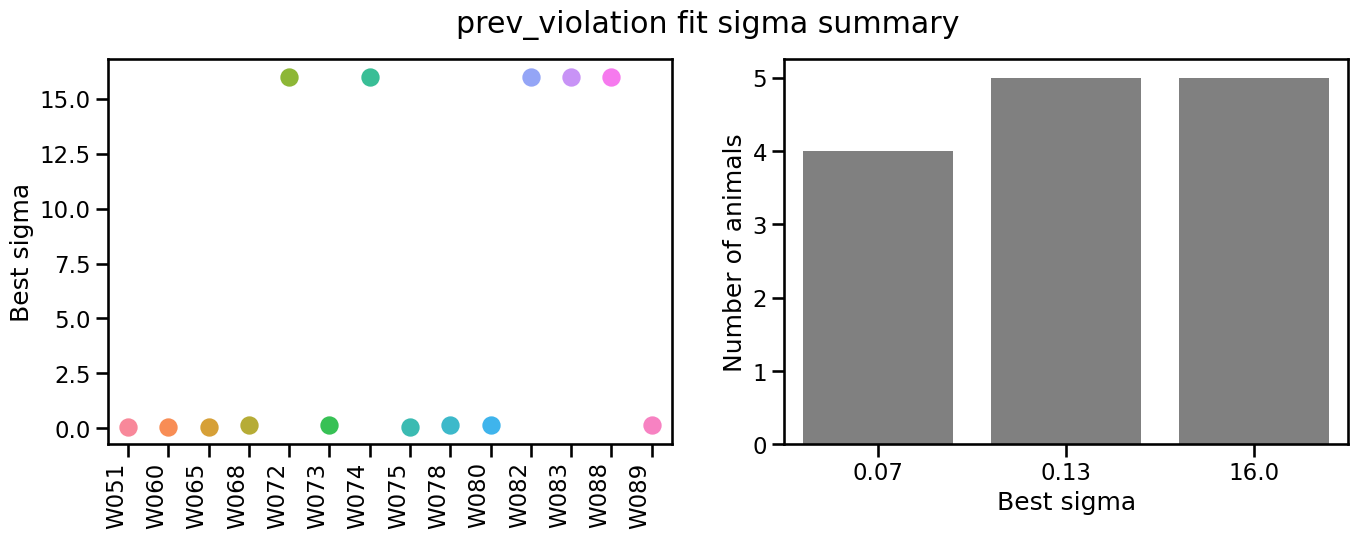

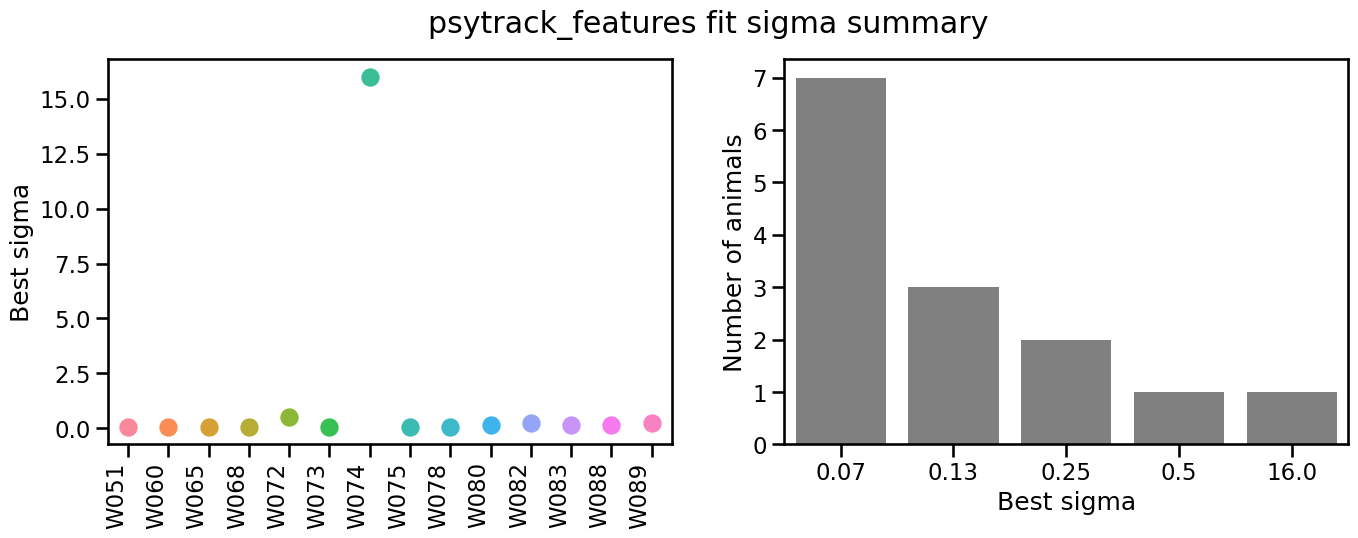

In [4]:
mvc = ModelVisualizerCompare(experiment)
df = mvc.find_best_fit(group="model_name")
for model_name, model_df in df.groupby("model_name"):
    mvc.plot_sigma_summary(model_df, title=f"{model_name} fit sigma summary")

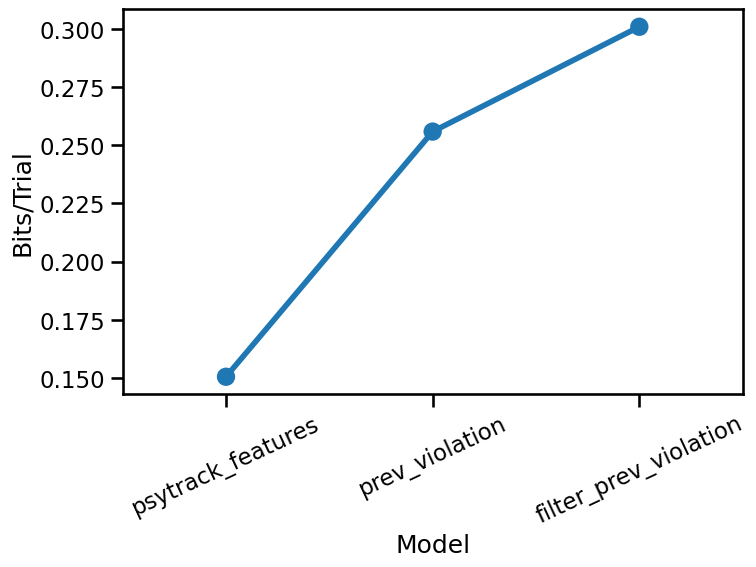

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
mvc.plot_model_comparison(
    hue=None,
    ax=ax,
    order=["psytrack_features", "prev_violation", "filter_prev_violation"],
    errorbar=None,
)

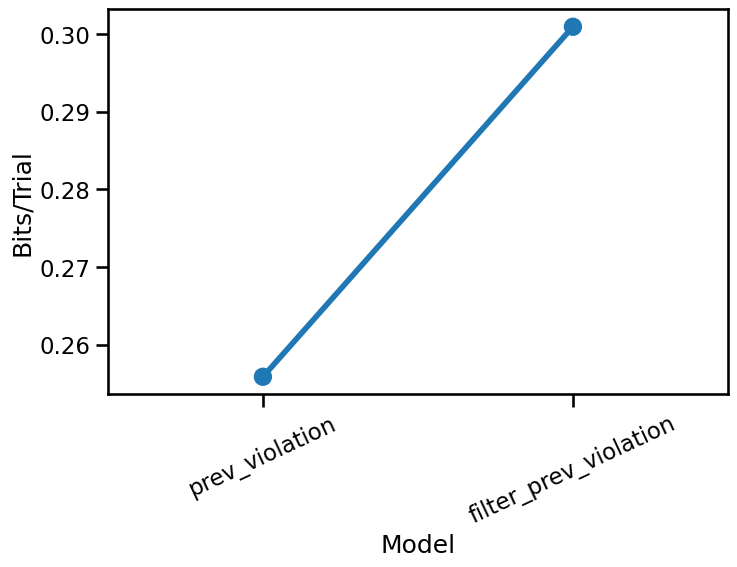

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
mvc.plot_model_comparison(
    hue=None,
    ax=ax,
    order=["prev_violation", "filter_prev_violation"],
    errorbar=None,
)

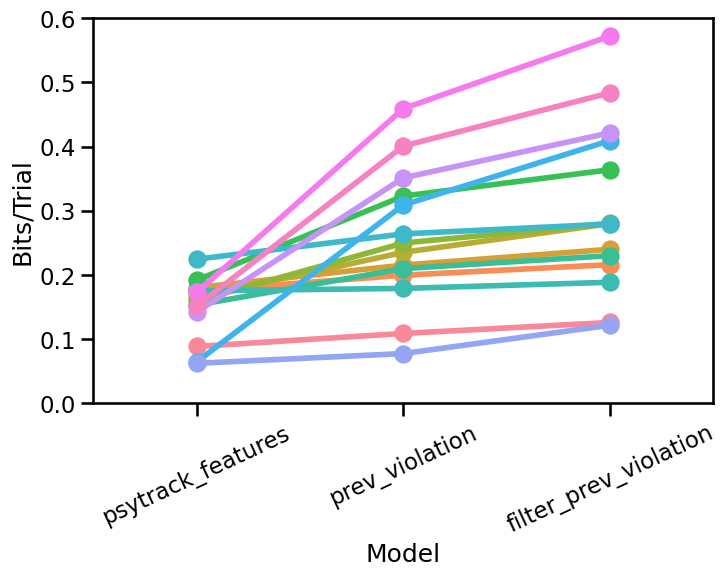

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
mvc.plot_model_comparison(
    hue="animal_id",
    ax=ax,
    order=["psytrack_features", "prev_violation", "filter_prev_violation"],
    ylim=(0, 0.6),
)

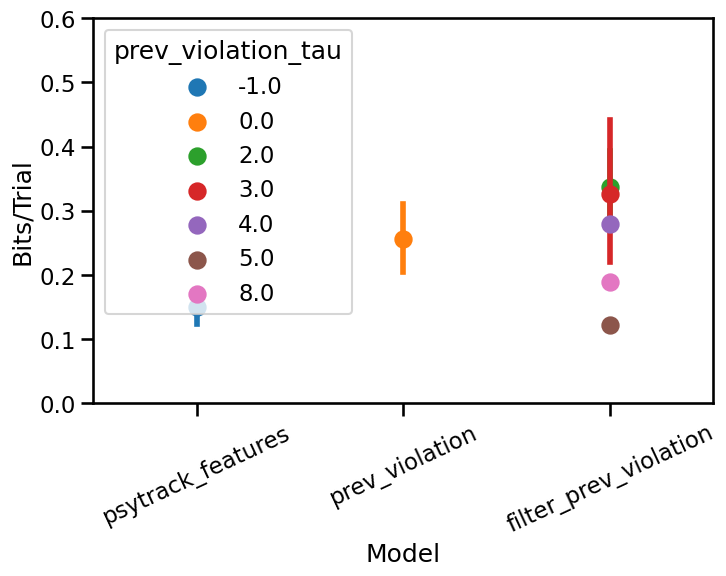

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
mvc.plot_model_comparison(
    hue="prev_violation_tau",
    ax=ax,
    order=["psytrack_features", "prev_violation", "filter_prev_violation"],
    ylim=(0, 0.6),
)

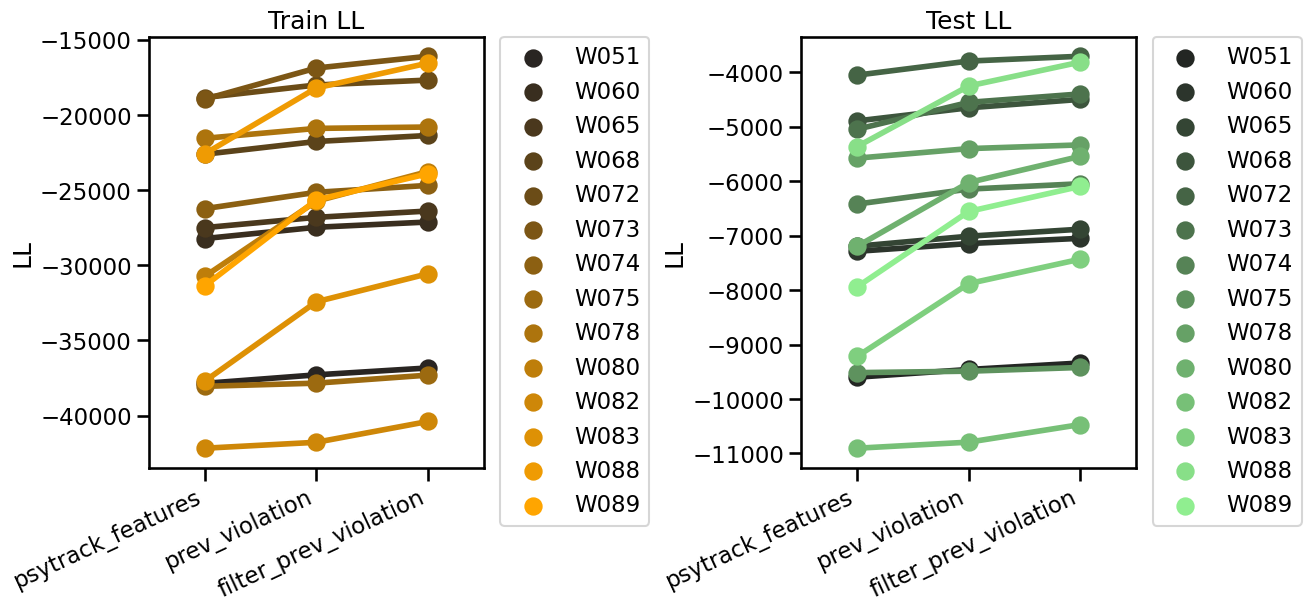

In [30]:
mvc.plot_train_and_test_ll(
    order=["psytrack_features", "prev_violation", "filter_prev_violation"],
    hue="animal_id", 
)

**Summary**: Again, things look good here. A similar (if not larger) increase is seen when adding the filtered regressor and it is strictly increasing. To build on these analyses in another notebook:

1. plot bits/trial condition on prev_violation_tau. this required making a column that repeats pre violation tau across the models for an animal.

2. plot delta ll for train and test for psytrack - filter prev viol and prev viol - filter prev viol

it would be worthwhile to add both of these plot types to the MVC class.